In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. LOAD & CLEANING DATA


In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

# Tentukan path file (sesuaikan dengan lokasi folder Anda di Drive)
path = "/content/gdrive/MyDrive/Praktikum/Praktikum 12/Data"

df = pd.read_csv(path + '/data (2).csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cols_to_drop = ['id']
if 'Unnamed: 32' in df.columns:
    cols_to_drop.append('Unnamed: 32')

df_clean = df.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']

# Encode target ('M' -> 1, 'B' -> 0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Data Shape:", X.shape)
print("Classes:", le.classes_)

Data Shape: (569, 30)
Classes: ['B' 'M']


# 2. STANDARISASI

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. IMPLEMENTASI PCA

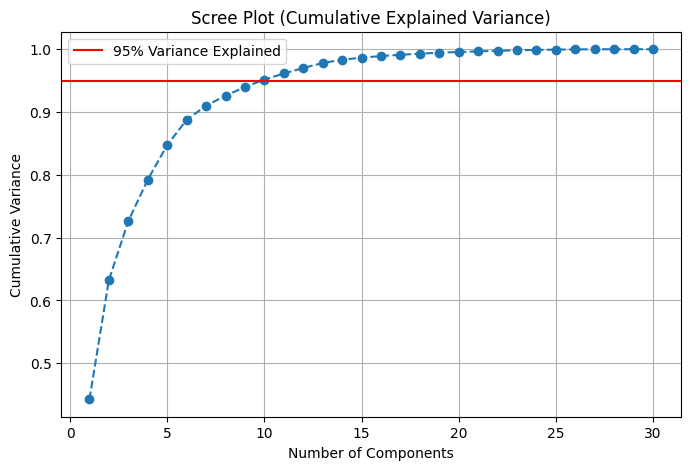

In [ ]:
pca_full = PCA()
pca_full.fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Explained')
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.legend()
plt.grid(True)
plt.show()

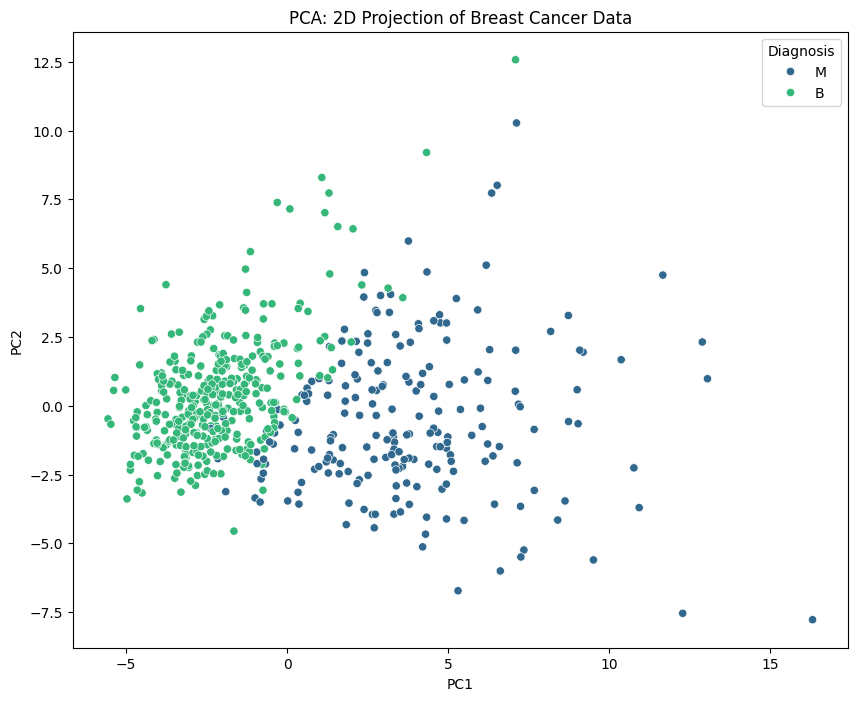

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Visualisasi 2D
pca_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = y # Gunakan label asli agar legenda jelas

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Diagnosis', data=pca_df, palette='viridis')
plt.title('PCA: 2D Projection of Breast Cancer Data')
plt.show()

# 4. KLASIFIKASI SVM (BEFORE vs AFTER PCA)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
svm_orig = SVC(kernel='linear', random_state=42)
svm_orig.fit(X_train, y_train)
y_pred_orig = svm_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_2d, y_encoded, test_size=0.3, random_state=42)
svm_pca = SVC(kernel='linear', random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = svm_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

In [ ]:
print(f"\n--- HASIL EVALUASI ---")
print(f"Akurasi Original (30 Fitur): {acc_orig:.4f}")
print(f"Akurasi PCA (2 Fitur Utama): {acc_pca:.4f}")

print("\nClassification Report (Original):")
print(classification_report(y_test, y_pred_orig, target_names=le.classes_))

print("\nClassification Report (PCA - 2 Components):")
print(classification_report(y_test_pca, y_pred_pca, target_names=le.classes_))


--- HASIL EVALUASI ---
Akurasi Original (30 Fitur): 0.9766
Akurasi PCA (2 Fitur Utama): 0.9708

Classification Report (Original):
              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Classification Report (PCA - 2 Components):
              precision    recall  f1-score   support

           B       0.97      0.98      0.98       108
           M       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

